In [54]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split


In [55]:
# Load the iris dataset
iris = load_iris()
X = iris.data[:, :2]  # We only take the first two features for visualization
y = iris.target
print("Dataset loaded successfully")
print("Features shape:", X.shape)
print("Labels shape:", y.shape)

Dataset loaded successfully
Features shape: (150, 2)
Labels shape: (150,)


In [56]:
# Spilt the dataset into training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 2)
(30, 2)
(120,)
(30,)


In [57]:
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
def decision_boundary_class_colored(clf, X, plotDistanceFromHyperplane=False, colorBar=False):

    # Get the min and max value of feature x1
    x1min, x1max = X[:,0].min() - 0.1, X[:, 0].max() + 0.1

    # Get the min and max value of feature x2
    x2min, x2max = X[:,1].min() - 0.1, X[:, 1].max() + 0.1

    # Create the mesh grid
    x1s = np.linspace(x1min, x1max, 100)
    x2s = np.linspace(x2min, x2max, 100)
    x1, x2 = np.meshgrid(x1s, x2s)


    # Create pairs of new points from the grid
    X_new = np.c_[x1.ravel(), x2.ravel()]


    # Compute the class predictions for all new points
    y_pred = clf.predict(X_new).reshape(x1.shape)


    # Generate the contourf plot for the predictions
    plt.contourf(x1, x2, y_pred, cmap=plt.cm.RdGy, alpha=0.99)

    if(plotDistanceFromHyperplane == True):

        # Compute the signed distance of a sample to the hyperplane for all new points
        y_decision = clf.decision_function(X_new).reshape(x1.shape)

        # Generate the contourf plot for the distance of all points from the hyperplane
        plt.contourf(x1, x2, y_decision, cmap=plt.cm.bwr, alpha=0.2)

    if(colorBar==True):
        plt.colorbar()

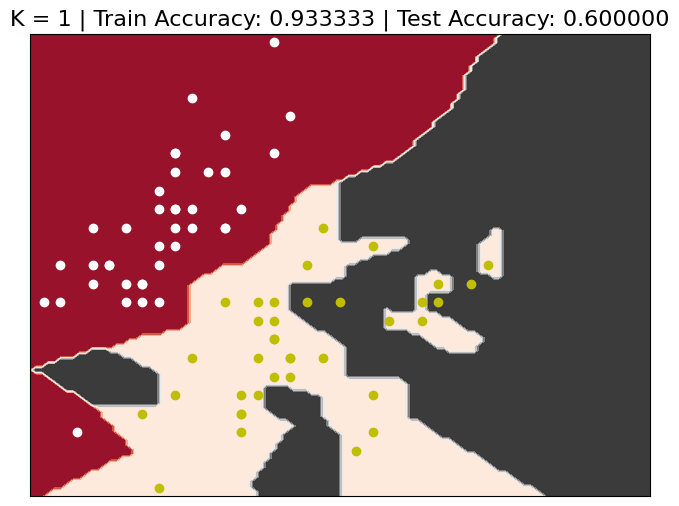

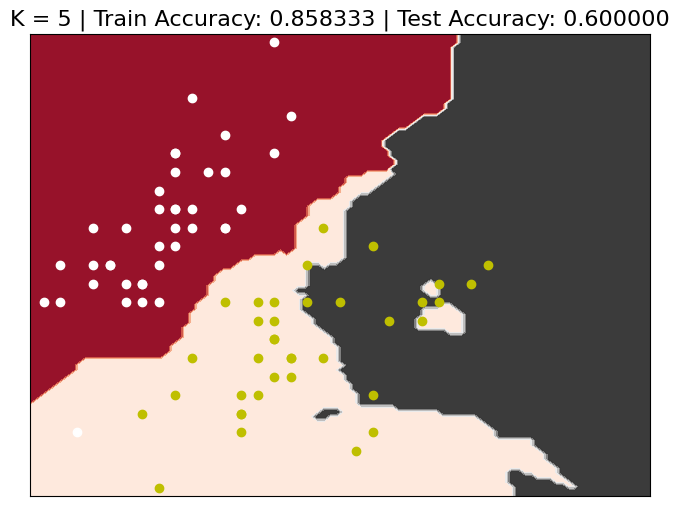

In [59]:
# Set the the range of K
neighbors = [1,5]


for i,k in enumerate(neighbors):

    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the model
    knn.fit(X_train, y_train)

    # Compute accuracy on the training set
    train_accuracy = knn.score(X_train, y_train)

     # Compute accuracy on the test set
    test_accuracy = knn.score(X_test, y_test)

    # Show the decision boundary only on the training data
    plt.figure(figsize=(8,6))
    decision_boundary_class_colored(knn, X_train, plotDistanceFromHyperplane=False)
    plt.plot(X_train[y_train.ravel()==0, 0], X_train[y_train.ravel()==0, 1], "wo")
    plt.plot(X_train[y_train.ravel()==1, 0], X_train[y_train.ravel()==1, 1], "yo")
    plt.title("K = %d | Train Accuracy: %f | Test Accuracy: %f"%
              (k, train_accuracy, test_accuracy) , fontsize=16)
    plt.xticks(())
    plt.yticks(())



    plt.show()
